<a href="https://colab.research.google.com/github/mariacb24/Machine-learning/blob/main/T3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

worksheet = gc.open('Data').sheet1
rows = worksheet.get_all_values()
import pandas as pd
df = pd.DataFrame.from_records(rows[1:], columns=rows[0])

x = df['median_income'].astype(float).values
y = df['population'].astype(float).values


In [ ]:
avg_x = df['median_income'].astype(float).mean()
avg_y = df['population'].astype(float).mean()

print(f"Rata-rata x (median_income): {avg_x}")
print(f"Rata-rata y (population): {avg_y}")

Rata-rata x (median_income): 33.656011279069766
Rata-rata y (population): 1425.4767441860465


In [ ]:
variance_x = df['median_income'].astype(float).var()
variance_y = df['population'].astype(float).var()

covariance_xy = df['median_income'].astype(float).cov(df['population'].astype(float))


print(f"Varians x (median_income): {variance_x}")
print(f"Varians y (population): {variance_y}")
print(f"Covariance x dan y (median_income dan population): {covariance_xy}")

Varians x (median_income): 477.81445758183713
Varians y (population): 1282470.4572332504
Covariance x dan y (median_income dan population): 729.8348542668708


In [ ]:
import statsmodels.api as sm

# Assuming 'x' and 'y' are defined as in your previous code
# Add a constant term to the independent variable
x = sm.add_constant(x)

# Fit the OLS model
model = sm.OLS(y, x)
results = model.fit()

# Print the coefficients
print(results.summary())

# Access the coefficients directly
print(f"Coefficients: {results.params}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     17.96
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           2.27e-05
Time:                        06:27:27   Log-Likelihood:            -1.7442e+05
No. Observations:               20640   AIC:                         3.488e+05
Df Residuals:                   20638   BIC:                         3.489e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1374.0691     14.466     94.985      0.0

Slope (w): 1.5274440584332247
Intercept (b): 1374.0690697272698


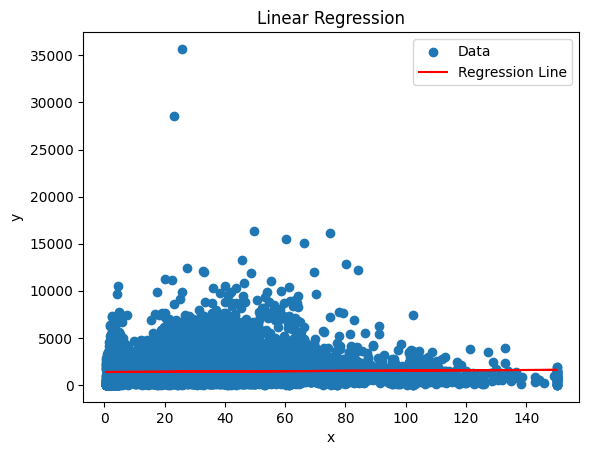

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Reshape the original x (from the DataFrame, NOT the one modified by statsmodels)
# Assuming 'df' is your pandas DataFrame
X = df['median_income'].astype(float).values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

w = model.coef_[0]
b = model.intercept_

print(f"Slope (w): {w}")
print(f"Intercept (b): {b}")

import matplotlib.pyplot as plt

plt.scatter(X, y, label='Data') # Use X here, not the modified x
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()